In [1]:
import utils
import pandas as pd

In [2]:
df = pd.read_csv('./data/liver_cirrhosis.csv')
df = utils.clean_data(df)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Paso 1: Preparación de los datos

# Supongamos que el DataFrame `df` ya tiene las características (X) y la clase de cirrosis (y)
# Dividir el dataset en características y variable objetivo
X = df.drop(columns=['Stage'])  # Elimina la columna de la clase
y = df['Stage']                 # Columna de la clase (etapa de cirrosis)

# Codificar las etiquetas de la variable objetivo si es categórica
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convertir las etiquetas en formato categórico (one-hot encoding)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 2: Construcción y Entrenamiento de la Red Neuronal

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dropout(0.3))  # Dropout para reducir sobreajuste
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Pérdida en prueba: {test_loss:.4f}, Precisión en prueba: {test_accuracy:.4f}")

# Decodificar predicciones y ver ejemplos de predicciones
predictions = model.predict(X_test_scaled)
predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Ver las primeras 10 predicciones
print("Predicciones de clase para los primeros 10 ejemplos de prueba:", predicted_classes[:10])


Epoch 1/50


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5167 - loss: 0.9815 - val_accuracy: 0.6640 - val_loss: 0.7785
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6333 - loss: 0.8104 - val_accuracy: 0.7038 - val_loss: 0.7139
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6607 - loss: 0.7671 - val_accuracy: 0.7297 - val_loss: 0.6651
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6741 - loss: 0.7343 - val_accuracy: 0.7372 - val_loss: 0.6382
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6936 - loss: 0.7089 - val_accuracy: 0.7500 - val_loss: 0.6214
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7006 - loss: 0.6920 - val_accuracy: 0.7642 - val_loss: 0.6018
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7059 - loss: 0.6823 - val_accuracy: 0.7617 - val_loss: 0.5821
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.7197 - loss: 0.6559 - val_accur

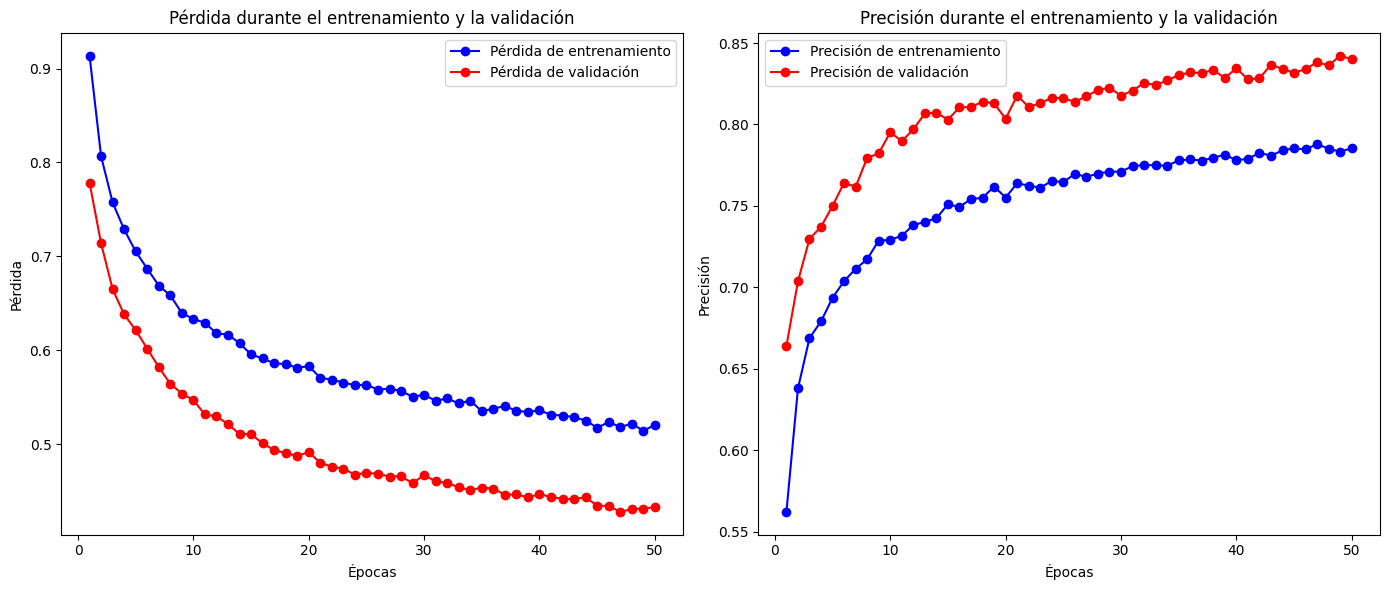

In [8]:
import matplotlib.pyplot as plt

# Extraer los datos de pérdida y precisión desde el objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear las figuras para loss y accuracy
epochs = range(1, len(train_loss) + 1)

# Gráfica de la pérdida (Loss)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de la precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
